<a href="https://colab.research.google.com/github/Sanjeeviit/MLT/blob/main/MLT_rev_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 5 tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [20]:
X,y= np.array([(-2,-3.9),(-1,-2.1),(1,1.7),(2,4.3)]).T
print(X,y)

[-2. -1.  1.  2.] [-3.9 -2.1  1.7  4.3]


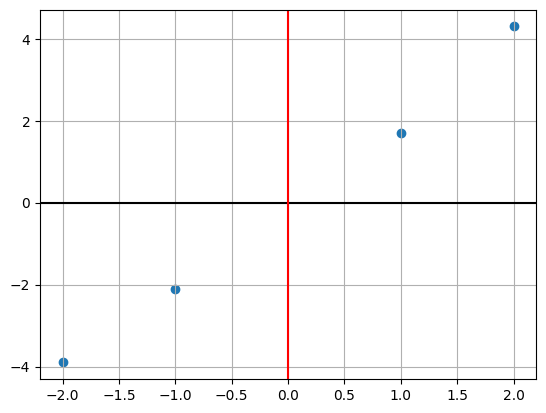

In [21]:
plt.scatter(X,y)
plt.grid()
plt.axhline(0,color='black')
plt.axvline(0,color='red')
plt.show()

Optimizing the error function

In [22]:
X = np.vstack((np.array([[1,1,1,1]]),X))
print(X)

[[ 1.  1.  1.  1.]
 [-2. -1.  1.  2.]]


In [25]:
w = np.linalg.pinv(X@X.T)@X@y
print(w)

[-1.11022302e-16  2.02000000e+00]


Using Gradient descent  w^t+1 = w^t - n^t[(xx^T)w^t-(Xy)]^

In [30]:
eta = 1e-1
w_grad = np.zeros((X.shape[0],1))
epochs =1
for i in range (epochs):
  w_grad = w_grad - eta*((X@X.T)@w_grad-X@y)
  print(w_grad)


[[-4.4408921e-17  2.0200000e+00]
 [-4.4408921e-17  2.0200000e+00]]


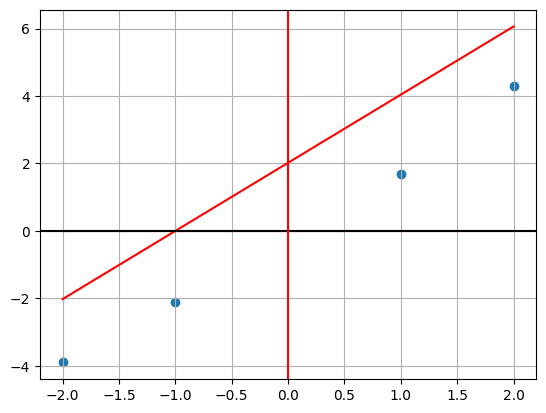

In [31]:
y_pred = w_grad.T@X
plt.scatter(X[1],y)
plt.plot(X[1],y_pred.T,color='red')
plt.axhline(0,color='black')
plt.axvline(0,color='red')
plt.grid()

Kernel regression algorithm

In [32]:
X,y= np.array([(1,1),(2,3.9),(-1,0.9),(-2,4.1)]).T
print(X,y)

[ 1.  2. -1. -2.] [1.  3.9 0.9 4.1]


In [33]:
X=np.vstack((np.array([[1,1,1,1]]),X))
print(X)

[[ 1.  1.  1.  1.]
 [ 1.  2. -1. -2.]]


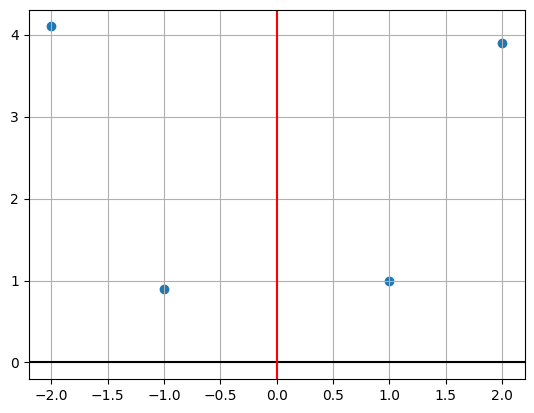

In [34]:
plt.scatter(X[1],y)
plt.grid()
plt.axhline(0,color='black')
plt.axvline(0,color='red')
plt.show()

Find value of K using K= (X.T@X+1)^2

In [35]:
K = (X.T@X+1)**2
print(K)

[[ 9. 16.  1.  0.]
 [16. 36.  0.  4.]
 [ 1.  0.  9. 16.]
 [ 0.  4. 16. 36.]]


In [36]:
alp =np.linalg.pinv(K)@y
print(alp)

[-0.18130556  0.17072222 -0.17980556  0.17372222]


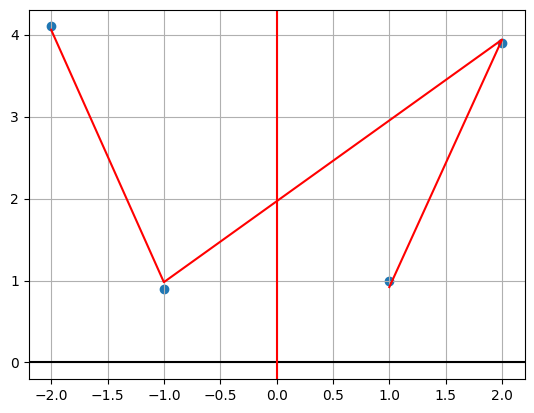

In [37]:
y_pred = K.T@alp
plt.scatter(X[1],y)
plt.plot(X[1],y_pred.T,color='red')
plt.axhline(0,color='black')
plt.axvline(0,color='red')
plt.grid()

In [38]:
y_pred

array([0.92, 3.94, 0.98, 4.06])

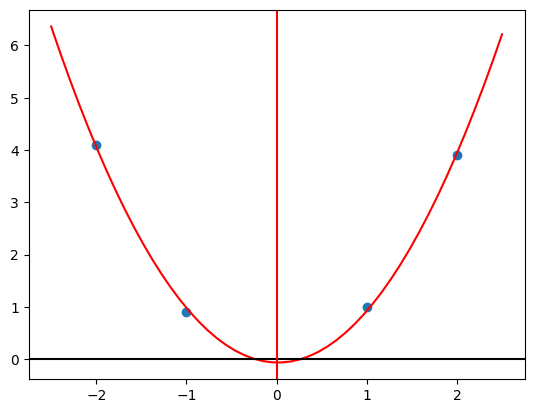

In [41]:
X_test = np.linspace(-2.5,2.5).reshape((1,-1))
X_test = np.vstack((np.ones((1,50)),X_test))
K_test = (X.T@X_test+1)**2
y_pred_test = K_test.T@alp

plt.scatter(X[1],y)
plt.plot(X_test[1],y_pred_test.T,color='red')
plt.axhline(0,color='black')
plt.axvline(0,color='red')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d= no of features n = no of datapoints

In [ ]:
X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T

In [ ]:
X.shape # transpose as  2 no of datapoints and d=8 features

(2, 8)

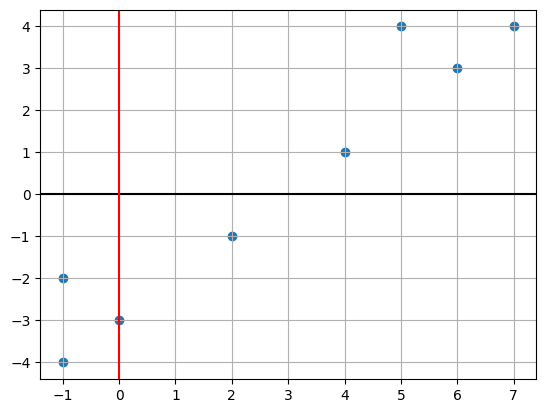

In [ ]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='black')
plt.axvline(0,color='red')
x_mean = X.mean(axis=1)
plt.plot(x_mean[0],x_mean[1],color='black')
plt.grid()
plt.show()

In [ ]:
def center(X):
    return X - X.mean(axis = 1).reshape(2,1)

d, n = X.shape
X_centered = center(X)

In [ ]:
X_centered

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

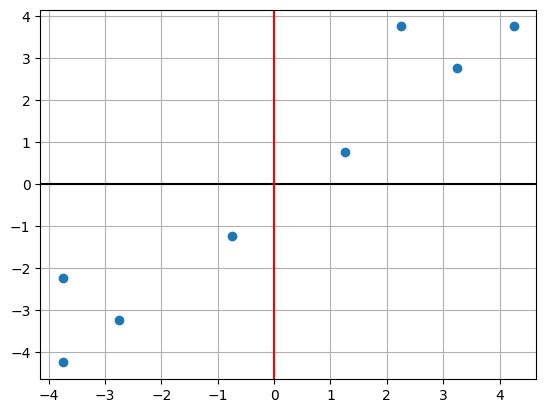

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='black')
plt.axvline(0,color='red')
c_mean =X_centered.mean(axis=1)
plt.plot(c_mean[0],c_mean[1],color='blue')
plt.grid()
plt.show()


In [ ]:
X_centered.mean(axis=1)

array([0., 0.])

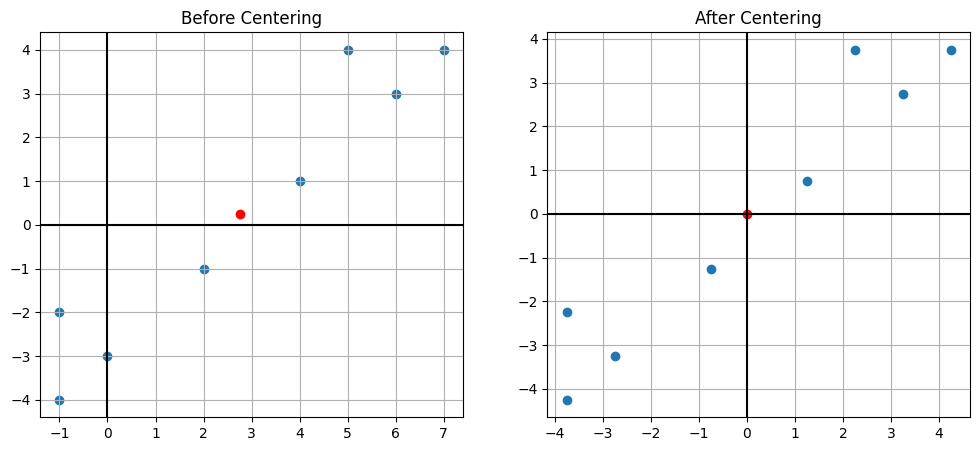

In [ ]:
#Compare the two graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

x_mean = X.mean(axis=1)

plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.title("Before Centering")



plt.subplot(1, 2, 2)
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

c_mean = X_centered.mean(axis=1)

plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.title("After Centering")

plt.show()

Find the covariance  C =1/n summation xixi^T =1/n XX^T

In [ ]:
def covariance(X):
  return X @ X.T/X.shape[1]
C= covariance(X_centered)
d =C.shape[0]
print(C)

[[8.9375 8.5625]
 [8.5625 8.9375]]


Compute the principal components
The  kth  principal component is given by the eigenvector corresponding to the  kth  largest eigenvalue

In [ ]:
def compute_pc(C):
  eig_val,eig_vec = np.linalg.eigh(C)
  w_1,w_2 = eig_vec[:,-1],eig_vec[:,-2]
  return w_1,w_2
pc = compute_pc(C)
print(pc)

(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))


In [ ]:
import numpy as np # Make sure you import numpy

def covariance(X):
  return X @ X.T/X.shape[1]

def compute_pc(C):
  eig_val,eig_vec = np.linalg.eigh(C)
  w_1,w_2 = eig_vec[:,-1],eig_vec[:,-2]
  return w_1,w_2

# Assuming X_centered is already defined
C= covariance(X_centered)
pc = compute_pc(C) # Make sure you actually call the function to calculate w_1 and w_2
w_1, w_2 = pc # Unpack the results of compute_pc

n = X_centered.shape[1] # You'll need to define n

#Now this line should work:
w_1 @ (X_centered.T @ w_1).reshape(1,n) + w_2 @ (X_centered.T @ w_2).reshape(1,n)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [ ]:
#Since the points are 2-dimensional, by combining the projection on the two PCs, we get back the centered dataset
w_1 @ (X_centered.T @ w_1).reshape(1,n) + w_2 @ (X_centered.T @ w_2).reshape(1,n)

NameError: name 'w_1' is not defined

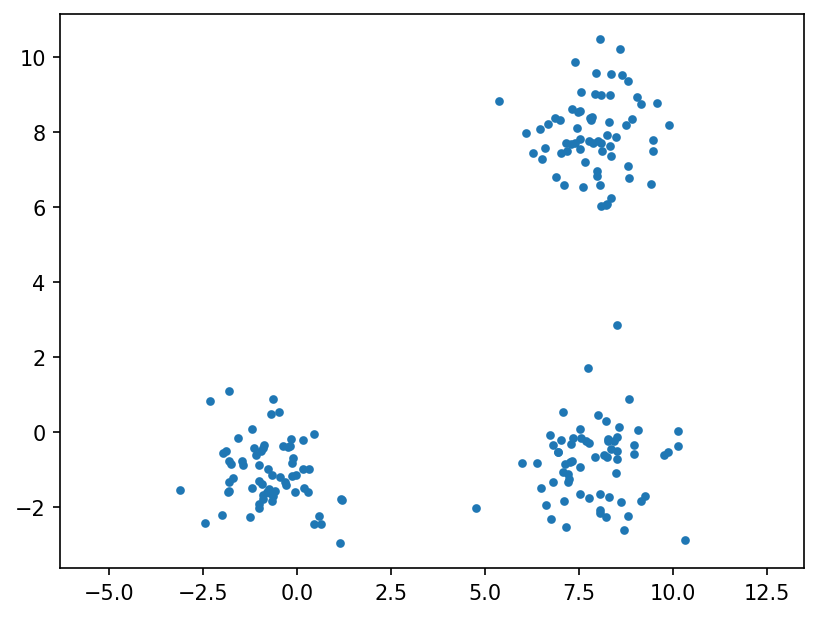

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi']=150

N=200
np.random.seed(42)

c1 = np.random.randn(N//3,2)+np.array([8,8])
c2 = np.random.randn(N//3,2)+np.array([8,-1])
c3 = np.random.randn(N//3,2)+np.array([-1,-1])

X= np.concatenate((c1,c2,c3))
plt.scatter(X[:,0],X[:,1], s=10);
plt.axis('equal')
plt.show()

Perform PCA on X

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 198 is different from 2)

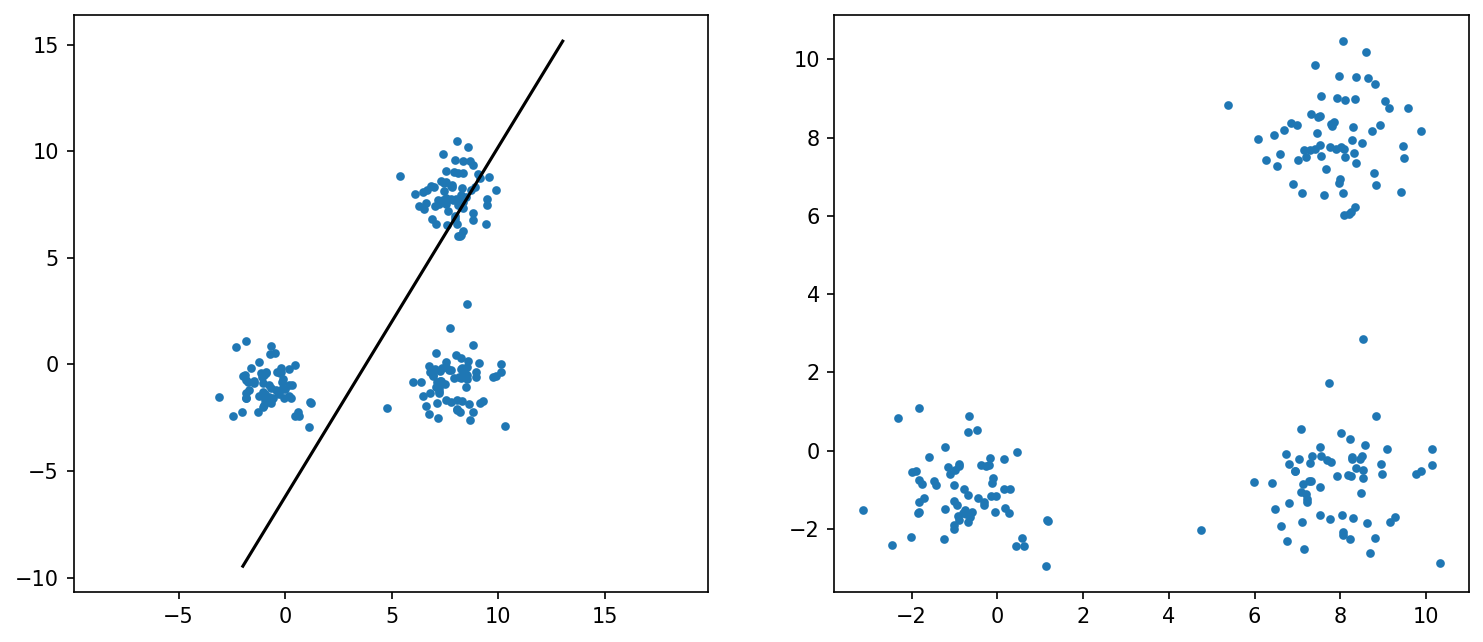

In [ ]:
plt.figure(figsize=(12,5))

X_mean =X.mean(axis=0)
X_centered = X - X_mean

cov_X = np.cov(X_centered)
eig_val ,eig_vec =np.linalg.eigh(cov_X)
pc_vec = eig_vec[:,-1]/eig_vec[:,-1][0]
x_range = np.array([-7,8])

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:, 1],s=10);
plt.axis('equal')
plt.plot(x_range +X_mean[0],x_range * pc_vec[1] +X_mean[1], color='black')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],s=10);

X_proj = np.array([i * eig_vec[:,-1] + X_mean for i in X_centered @ eig_vec[:,-1]])

plt.scatter(X_proj[:,0],X_proj[:, 1],s=20, color ='red');

plt.plot(x_range +X_mean[0],x_range * pc_vec[1] +X_mean[1],color='black')

plt.show()

In [ ]:
def obj(X,cluster_centers):
  return sum([np.min([np.linalg.norm(x_i - cluster_center)**2 for cluster_center in cluster_centers]) for x_i in x])

In [ ]:
n = 3
cluster_centers = X[[70,85,80]]

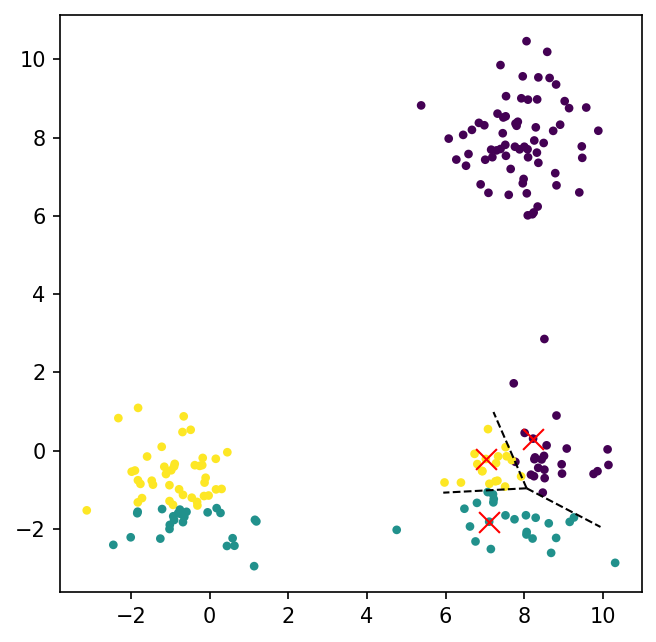

In [ ]:
from scipy.spatial import Voronoi,voronoi_plot_2d
def cluster_assignment(X, cluster_centers):
  z=np.zeros(X.shape[0])
  for i in range (X.shape[0]):
    z[i] = np.argmin([np.linalg.norm(X[i]-cluster_center) for cluster_center in cluster_centers])
  return z
z = cluster_assignment(X,cluster_centers)

fig, (ax) = plt.subplots(1,1)
fig.set_size_inches(5,5)

ax.scatter(X[:,0],X[:,1],c=z, s=10)
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],marker ='x',s=100 , color='red',linewidth=1)
vor = Voronoi(cluster_centers)

voronoi_plot_2d(vor, ax=ax,show_points=False,show_vertices=False);

ax.axis('equal');

In [ ]:
def recompute_clusters(X,z):
  cluster_centers = np.array([np.mean(X[z==i],axis =0) for i in range(n)])
  return cluster_centers

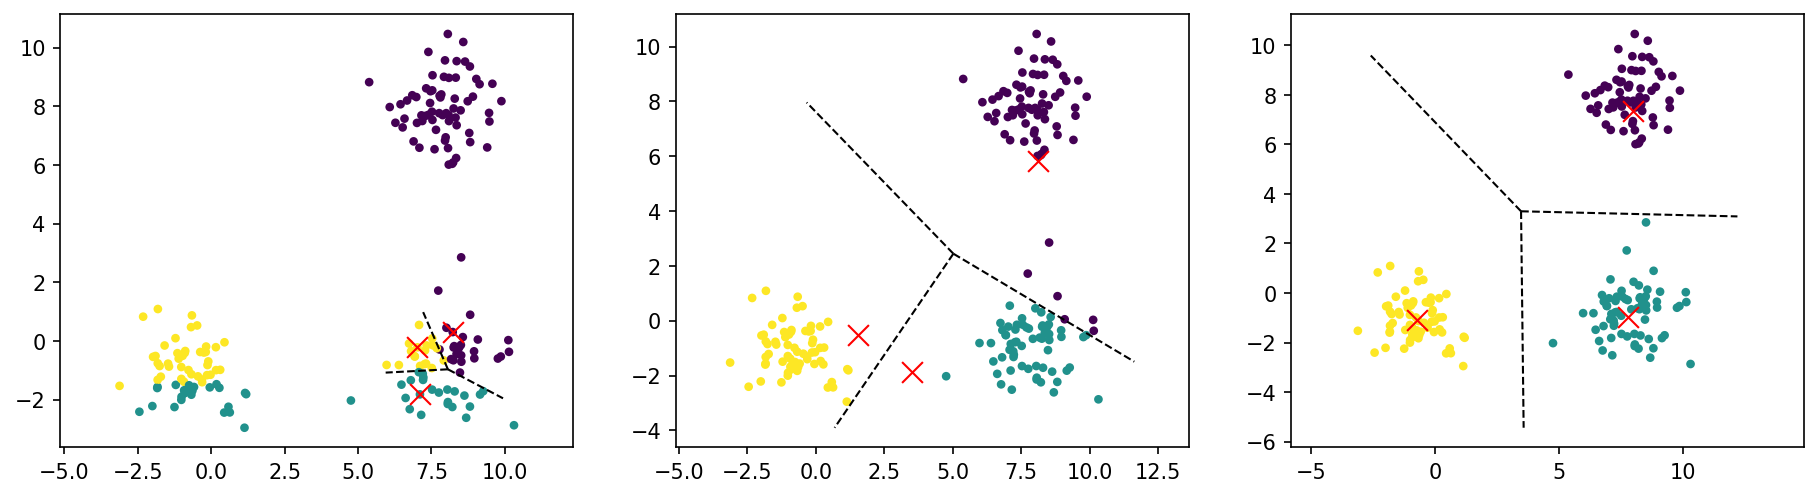

In [ ]:
fig,ax =plt.subplots(1,3)
fig.set_size_inches(15,3.75)

for i in range(3):
  z=cluster_assignment(X,cluster_centers)
  ax[i].scatter(X[:,0],X[:,1],c=z,s=10);
  ax[i].scatter(cluster_centers[:,0],cluster_centers[:,1],marker ='x',s=100, color ='red',linewidth = 1)
  vor = Voronoi(cluster_centers)

  voronoi_plot_2d(vor, ax=ax[i],show_points=False,show_vertices=False)
  ax[i].axis('equal');
  cluster_centers = recompute_clusters(X,z)

Generate a complex dataset with 6 clusters

(-5.0, 5.0, -4.0, 5.0)

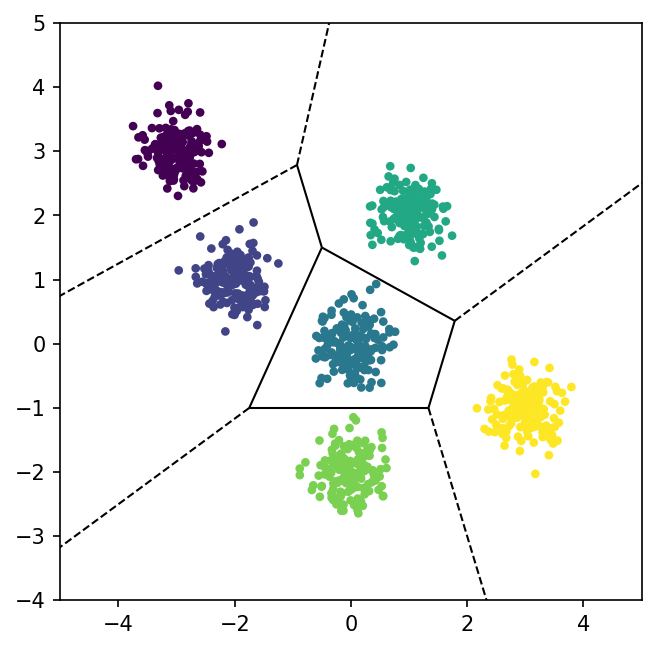

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

cen = [(-3,3),(-2,1),(0,0),(1,2),(0,-2),(3,-1)]

X,ideal_z = make_blobs(n_samples=1000, centers = cen , n_features =2, cluster_std =0.3, random_state=13, center_box=(-3,3))

fig, (ax) = plt.subplots()

ax.scatter(X[:,0],X[:,1], s=10, c=ideal_z)

vor = Voronoi(cen)

voronoi_plot_2d(vor, ax=ax,show_points=False,show_vertices=False);

fig.set_size_inches(5,5,4.5)
ax.axis([-5,5,-4,5])
